# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
#print(lat_lngs[0][0])

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    #print(lat_lng[0], lat_lng[1])
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
       cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities[100]


606

In [6]:
#url = "api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"
url = f"api.openweathermap.org/data/2.5/weather?q=Lagos&appid={weather_api_key}"
url

'api.openweathermap.org/data/2.5/weather?q=Lagos&appid=a4b94527dc26377c2419c64b83299f2e'

In [8]:
CityResponseList = []

#Tencities = cities[0:10]
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    print(f"requesting: {city}")
    response = requests.get(url).json()
    if "cod" in response:
        code = response['cod']
        if code == 200:
            CityResponseList.append(response)
        else:
            print(f"...incomplete: {city}")
# print(CityResponseList)


requesting: miguel calmon
requesting: busselton
requesting: ponda
requesting: nara
requesting: butaritari
requesting: kapaa
requesting: deputatskiy
requesting: punta arenas
requesting: nizhneyansk
...incomplete: nizhneyansk
requesting: new norfolk
requesting: ushuaia
requesting: atuona
requesting: salina cruz
requesting: tuatapere
requesting: touros
requesting: klaksvik
requesting: rikitea
requesting: werda
requesting: bandarbeyla
requesting: hermanus
requesting: mys shmidta
...incomplete: mys shmidta
requesting: atyrau
requesting: khani
requesting: emerald
requesting: tigre
requesting: leningradskiy
requesting: albany
requesting: muisne
requesting: saskylakh
requesting: tsihombe
...incomplete: tsihombe
requesting: kruisfontein
requesting: avarua
requesting: doha
requesting: axochiapan
requesting: port hardy
requesting: taolanaro
...incomplete: taolanaro
requesting: bluff
requesting: sao joao da barra
requesting: belushya guba
...incomplete: belushya guba
requesting: nikolskoye
request

requesting: ust-kulom
requesting: siniscola
requesting: sorvag
...incomplete: sorvag
requesting: bowen
requesting: asau
requesting: guerrero negro
requesting: chapais
requesting: nome
requesting: auki
requesting: obo
requesting: inhambane
requesting: pevek
requesting: kedrovka
requesting: vestmannaeyjar
requesting: fairbanks
requesting: preobrazheniye
requesting: yulara
requesting: maua
requesting: okhotsk
requesting: yar-sale
requesting: virginia beach
requesting: dunedin
requesting: carupano
requesting: eydhafushi
requesting: namibe
requesting: manglaur
requesting: dzerzhinsk
requesting: egvekinot
requesting: shiraz
requesting: soure
requesting: culebra
requesting: ambulu
requesting: bismarck
requesting: maragogi
requesting: margate
requesting: bibbiena
requesting: scarborough
requesting: natal
requesting: motema
requesting: senno
requesting: tilichiki
requesting: athabasca
requesting: ballina
requesting: sinnamary
requesting: manicore
requesting: pimenta bueno
requesting: goderich
r

In [9]:
Item_dict = {}
ItemList = []
len(CityResponseList)
if len(CityResponseList) > 0:
    for Item in CityResponseList:
        Item_dict = {}
        Item_dict['City'] = Item['name']
        Item_dict['Lat'] = Item['coord']['lat']
        Item_dict['Lng'] = Item['coord']['lon']
        Item_dict['Max Temp']= Item['main']['temp_max']
        Item_dict['Humidity'] = Item['main']['humidity']
        Item_dict['Cloudiness'] = Item['clouds']['all']
        Item_dict['Wind Speed'] = Item['wind']['speed']
        Item_dict['Country']= Item['sys']['country']
        Item_dict['Date'] = Item['dt']
        
        
        ItemList.append(Item_dict)
# City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country	Date

In [42]:
df = pd.DataFrame(ItemList)
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Miguel Calmon,-11.4289,-40.5950,298.50,67,100,1.77,BR,1643478428
1,Busselton,-33.6500,115.3333,292.09,83,0,7.17,AU,1643478428
2,Ponda,15.4000,74.0167,295.24,53,2,1.69,IN,1643478428
3,Nara,34.6851,135.8049,279.75,46,86,1.41,JP,1643478137
4,Butaritari,3.0707,172.7902,300.74,78,79,8.31,KI,1643478428
...,...,...,...,...,...,...,...,...,...
560,Sitges,41.2351,1.8119,287.71,50,1,2.49,ES,1643478502
561,Candia,43.0779,-71.2767,265.39,88,100,0.45,US,1643478502
562,Turbat,26.0023,63.0440,294.16,57,0,2.71,PK,1643478502
563,Koson,39.0375,65.5850,277.33,57,99,3.06,UZ,1643478502


In [33]:
df_describe = df.describe()
df_describe

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.553574,18.785467,283.342850,72.304425,58.352212,3.677912,1.643478e+09
std,33.486716,92.222586,17.490854,21.151750,39.333204,3.022688,6.330842e+01
min,-54.800000,-179.166700,238.170000,1.000000,0.000000,0.000000,1.643478e+09
25%,-8.650000,-58.736800,271.320000,62.000000,20.000000,1.610000,1.643478e+09
50%,22.933300,23.031500,289.490000,76.000000,74.000000,2.880000,1.643478e+09
75%,48.166700,101.766700,297.880000,88.000000,99.000000,5.000000,1.643478e+09
max,78.218600,179.316700,310.990000,100.000000,100.000000,22.710000,1.643479e+09


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
df.to_csv("../output_data/data.csv", index=False, header = True)

In [15]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data = df.loc[df['Humidity']<100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Miguel Calmon,-11.4289,-40.5950,298.50,67,100,1.77,BR,1643478428
1,Busselton,-33.6500,115.3333,292.09,83,0,7.17,AU,1643478428
2,Ponda,15.4000,74.0167,295.24,53,2,1.69,IN,1643478428
3,Nara,34.6851,135.8049,279.75,46,86,1.41,JP,1643478137
4,Butaritari,3.0707,172.7902,300.74,78,79,8.31,KI,1643478428
...,...,...,...,...,...,...,...,...,...
560,Sitges,41.2351,1.8119,287.71,50,1,2.49,ES,1643478502
561,Candia,43.0779,-71.2767,265.39,88,100,0.45,US,1643478502
562,Turbat,26.0023,63.0440,294.16,57,0,2.71,PK,1643478502
563,Koson,39.0375,65.5850,277.33,57,99,3.06,UZ,1643478502


In [53]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


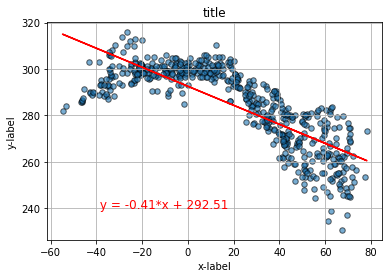

'plt.scatter(x, y)\nplt.title("title")\nplt.xlabel("x-label")\nplt.ylabel("y-label")\nplt.grid()\nplt.show()'

In [67]:
LatTemp = clean_city_data[['Lat', 'Max Temp']]
LatTemp.plot.scatter('Lat', 'Max Temp', s=30, linewidths = 1, marker = 'o', edgecolor = 'black', alpha = 0.6)
plt.title("title")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.grid()


m, b = np.polyfit(x, y, 1)
#m = slope, b=intercept

m= round(m,2)
b=round(b,2)
eqn = f" y = {m}*x + {b}"

plt.plot(x, m*x + b, color ='red')
plt.annotate(eqn, (-40, 240), color = 'red', fontsize = 12)
plt.show()

x= clean_city_data['Lat']
y = clean_city_data['Max Temp']


# lineregress 

plt.annotate line_eq
plt.plot(x, regress_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


'''plt.scatter(x, y)
plt.title("title")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.grid()
plt.show()'''

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

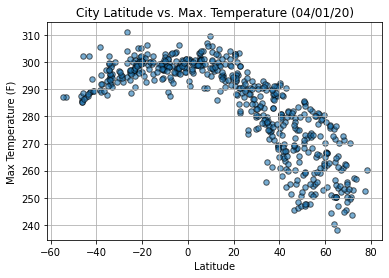

In [90]:
LatTemp = clean_city_data[['Lat', 'Max Temp']]
LatTemp.plot.scatter('Lat', 'Max Temp', s=30, linewidths = 1, marker = 'o', edgecolor = 'black', alpha = 0.6)
plt.title("City Latitude vs. Max. Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
# Save the plot and display it
plt.savefig("../output_data/LatTemp.png")

## Latitude vs. Humidity Plot

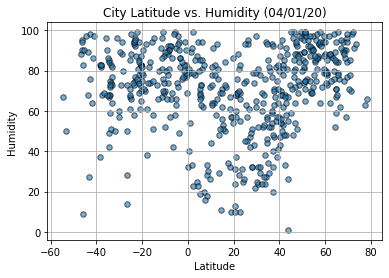

In [91]:
LatHum = clean_city_data[['Lat', 'Humidity']]
LatHum.plot.scatter('Lat', 'Humidity', s=30, linewidths = 1, marker = 'o', edgecolor = 'black', alpha = 0.6)
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("../output_data/LatHUm.png")

## Latitude vs. Cloudiness Plot

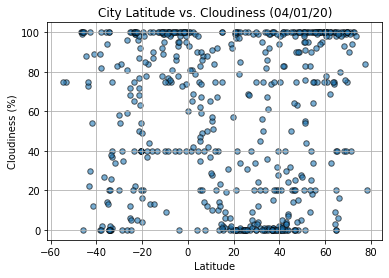

In [92]:
LatCloud = clean_city_data[['Lat', 'Cloudiness']]
LatCloud.plot.scatter('Lat', 'Cloudiness', s=30, linewidths = 1, marker = 'o', edgecolor = 'black', alpha = 0.6)
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/LatCloud.png")

## Latitude vs. Wind Speed Plot

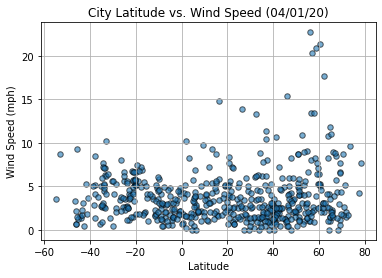

In [93]:
LatWind = clean_city_data[['Lat', 'Wind Speed']]
LatWind.plot.scatter('Lat', 'Wind Speed', s=30, linewidths = 1, marker = 'o', edgecolor = 'black', alpha = 0.6)
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/LatWind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7105156602592024


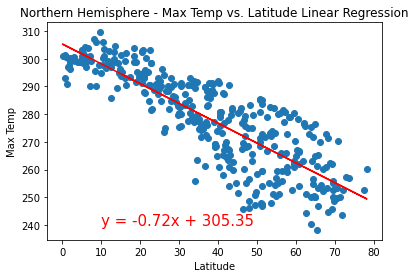

In [94]:
LatTemp = clean_city_data[['Lat', 'Max Temp']]

LatNorth = clean_city_data[clean_city_data['Lat']>=0]
LatNorth

LatTempNorth = LatNorth[['Lat', 'Max Temp']]

x_values = LatTempNorth['Lat']
y_values = LatTempNorth['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,240),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/LatTempNorth.png")
plt.show()



The r-squared is: 0.2686097572266018


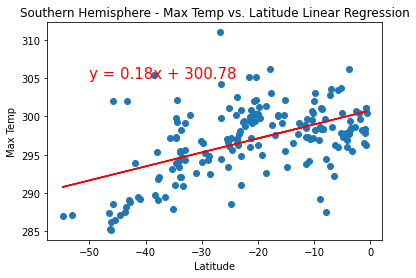

In [96]:
LatTemp = clean_city_data[['Lat', 'Max Temp']]

TempSouth = clean_city_data[clean_city_data['Lat']<0]
TempSouth

LatTempSouth = TempSouth[['Lat', 'Max Temp']]

x_values = LatTempSouth['Lat']
y_values = LatTempSouth['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 305),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/LatTempSouth.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1771657795004641


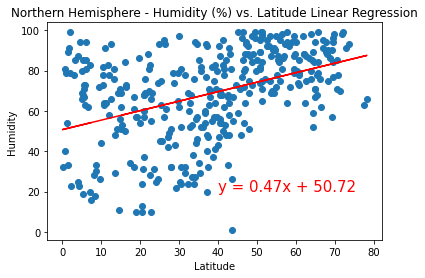

In [97]:
#LatHum = clean_city_data[['Lat', 'Humidity']]

LatNorth = clean_city_data[clean_city_data['Lat']>=0]
LatNorth

LatHumNorth = LatNorth[['Lat', 'Humidity']]

x_values = LatHumNorth['Lat']
y_values = LatHumNorth['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/LatHumNorth.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.022239734597278186


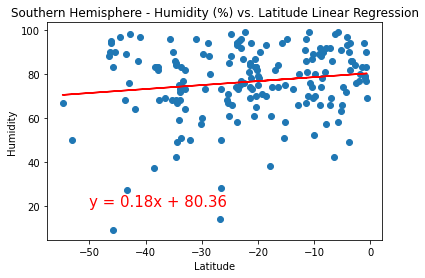

In [98]:
LatSouth = clean_city_data[clean_city_data['Lat']<0]
LatSouth

LatHumSouth = LatSouth[['Lat', 'Humidity']]

x_values = LatHumSouth['Lat']
y_values = LatHumSouth['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/LatHumSouth.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06838859478401153


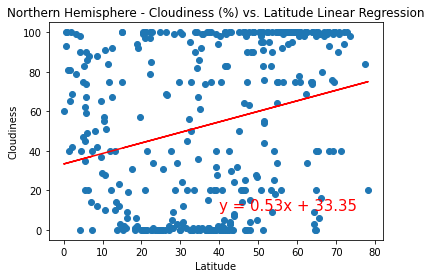

In [99]:
LatNorth = clean_city_data[clean_city_data['Lat']>=0]
LatNorth

LatCloudNorth = LatNorth[['Lat', 'Cloudiness']]

x_values = LatCloudNorth['Lat']
y_values = LatCloudNorth['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/LatCloudNorth.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11566538241414655


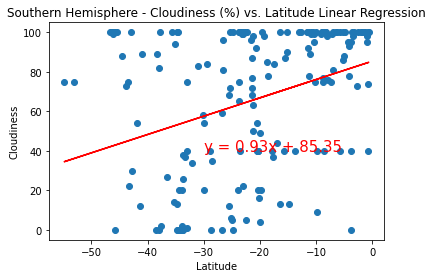

In [100]:
LatSouth = clean_city_data[clean_city_data['Lat']<0]
LatSouth

LatCloudSouth = LatSouth[['Lat', 'Cloudiness']]

x_values = LatCloudSouth['Lat']
y_values = LatCloudSouth['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/LatCloudSouth.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023732396613604226


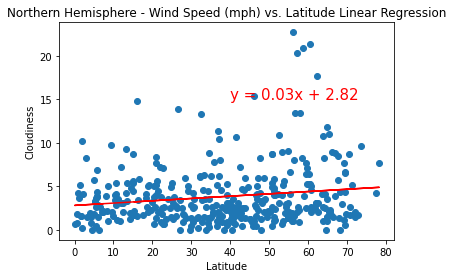

In [101]:
LatNorth = clean_city_data[clean_city_data['Lat']>=0]
LatNorth

LatWindNorth = LatNorth[['Lat', 'Wind Speed']]

x_values = LatWindNorth['Lat']
y_values = LatWindNorth['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/LatWindNorth.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.038968564268462846


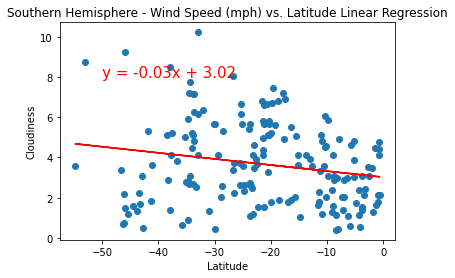

In [102]:
LatSouth = clean_city_data[clean_city_data['Lat']<0]
LatSouth

LatWindSouth = LatSouth[['Lat', 'Wind Speed']]

x_values = LatWindSouth['Lat']
y_values = LatWindSouth['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/LatWindSouth.png")
plt.show()